<h1> Validation Measures </h1>

#### Read the data

In [3]:
import pickle as pkl

with open('../data/titanic_tansformed.pkl', 'rb') as f:
    df_data = pkl.load(f)

In [5]:
df_data.head(8)

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1
5,0,25.0,0,0,8.4583,0,1,1,1,0
6,0,54.0,0,0,51.8625,0,0,1,0,1
7,0,2.0,3,1,21.0750,0,1,1,0,1


## Logistic Regression

In [6]:
data = df_data.drop("Survived",axis=1)
label = df_data["Survived"]

In [7]:
data.head()

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,22.0,1,0,7.2500,0,1,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,1,0,1


In [8]:
from sklearn.cross_validation import train_test_split
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size = 0.3, random_state = 101)

/Users/talat/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
from sklearn.linear_model import LogisticRegression

# Run Logistic Regression
log_regr = LogisticRegression()
log_regr.fit(data_train, label_train)
predictions = log_regr.predict(data_test)

<img src='img/precision_recall_table.png'>

### Accuracy

\begin{align}
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
\end{align}

In [11]:
print('Accuracy', log_regr.score(data_test, label_test))

Accuracy 0.8127340823970037


### Precision Recall

<img src='img/precision_recall.png'>

\begin{align}
Precision = \frac{TP}{TP + FP}
\end{align}


\begin{align}
Recall = \frac{TP}{TP + FN}
\end{align}


\begin{align}
F1 Score = 2 * \frac{Recall * Precision}{Recall + Precision}
\end{align}

In [14]:
from sklearn.metrics import classification_report
print(classification_report(label_test, predictions))

             precision    recall  f1-score   support

          0       0.81      0.91      0.86       163
          1       0.83      0.65      0.73       104

avg / total       0.81      0.81      0.81       267



## Cross Validation

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# skf = StratifiedKFold(n_splits=5)

log_regr = LogisticRegression()
log_regr.fit(data_train, label_train)
score = log_regr.score(data_train, label_train)
print('Train accuracy score', score)


score_cv = cross_val_score(log_regr, data_train, label_train, cv=10, scoring='accuracy')
print('Cross Val Accuracy for each run', score_cv)
print('CrossVal Accuracy', score_cv.mean())


Train accuracy score 0.8102893890675241
Cross Val Accuracy for each run [0.74603175 0.6984127  0.77777778 0.88888889 0.79365079 0.76190476
 0.81967213 0.81967213 0.90163934 0.7704918 ]
CrossVal Accuracy 0.7978142076502732


## AUC - Receiver Operating Characteristics
- How much a model is capable of distinguishing between classes
- Higher the AUC, better the model is

$
\begin{align}
True Positive Rate = \frac{TP}{TP + FN}
\end{align}
$

<br>
$
\begin{align}
\ False Positive Rate = 1 - \frac{TN}{TN + FP} = \frac{FP}{TN + FP}
\end{align}
$

In [16]:
from sklearn import metrics

fpr, tpr, threshold = metrics.roc_curve(label_test, log_regr.predict(data_test))
roc_auc = metrics.auc(fpr, tpr)
print('AUCROC Stage1 vs Healthy: ' , roc_auc)

AUCROC Stage1 vs Healthy:  0.7839782916470033


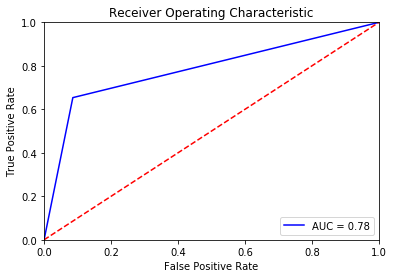

In [18]:
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

A really good material for understanding [AUC-ROC](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5) visually